# LEAD SCORING ASSIGNMENT

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Steps
        1. Importing Required Data
        2. Initial Visualization/Exploration
        3. Data Initial Cleaning
        4. EDA
            a. Univariate Analysis
            b. Bivariate Analysis
        5. Data Standardization and Cleaning
        6. Creating Dummy Variables
        7. Split into train and test data
        8. Random Scan
        9. Grid Scan
        10. Cross Validation
        11. Precision, Recall, ROC curve and AUC
        12. Evaluation on test data

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

# Load Data

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [4]:
# We will replace the space in column names with "_" and make all of them in lowercase 
df.columns = [col.replace(' ','_').lower() for col in df.columns]


In [5]:
df.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,country,specialization,how_did_you_hear_about_x_education,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,tags,lead_quality,update_me_on_supply_chain_content,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Exploring the Data

In [6]:
# Shape of data
df.shape 

(9240, 37)

In [7]:
# Percentage of Null Values in data
df.isnull().sum()*100/df.shape[0]

prospect_id                                       0.000000
lead_number                                       0.000000
lead_origin                                       0.000000
lead_source                                       0.389610
do_not_email                                      0.000000
do_not_call                                       0.000000
converted                                         0.000000
totalvisits                                       1.482684
total_time_spent_on_website                       0.000000
page_views_per_visit                              1.482684
last_activity                                     1.114719
country                                          26.634199
specialization                                   15.562771
how_did_you_hear_about_x_education               23.885281
what_is_your_current_occupation                  29.112554
what_matters_most_to_you_in_choosing_a_course    29.318182
search                                            0.0000

In [8]:
# Dropping columns with more than 40% null data
drop_cols = df.columns[df.isnull().sum()*100/df.shape[0] > 40]
df = df.drop(columns=drop_cols)
df.shape

(9240, 32)

In [9]:
# Percentage of Null Values in data after dropping columns
df.isnull().sum()*100/df.shape[0]

prospect_id                                       0.000000
lead_number                                       0.000000
lead_origin                                       0.000000
lead_source                                       0.389610
do_not_email                                      0.000000
do_not_call                                       0.000000
converted                                         0.000000
totalvisits                                       1.482684
total_time_spent_on_website                       0.000000
page_views_per_visit                              1.482684
last_activity                                     1.114719
country                                          26.634199
specialization                                   15.562771
how_did_you_hear_about_x_education               23.885281
what_is_your_current_occupation                  29.112554
what_matters_most_to_you_in_choosing_a_course    29.318182
search                                            0.0000

# Analysis of columns having null values

In [10]:
# Analysing column "what_matters_most_to_you_in_choosing_a_course"
df.what_matters_most_to_you_in_choosing_a_course.value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: what_matters_most_to_you_in_choosing_a_course, dtype: int64

In [11]:
# for the columns "what_matters_most_to_you_in_choosing_a_course" we can fill nulls with value 'Other'
df.what_matters_most_to_you_in_choosing_a_course = df.what_matters_most_to_you_in_choosing_a_course.fillna('Others')

In [12]:
# Analysing columnn "what_is_your_current_occupation"
df.what_is_your_current_occupation.value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: what_is_your_current_occupation, dtype: int64

In [13]:
# for the columns "what_matters_most_to_you_in_choosing_a_course" we can fill nulls with value 'Unemployed'
df.what_is_your_current_occupation = df.what_is_your_current_occupation.fillna('Unemployed')

In [14]:
# Analyzing column "how_did_you_hear_about_x_education"
df.how_did_you_hear_about_x_education.value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: how_did_you_hear_about_x_education, dtype: int64

In [15]:
# for the columns "how_did_you_hear_about_x_education" we can fill nulls with value "Other" we will also replace value "Select" with "Other"
df.how_did_you_hear_about_x_education = df.how_did_you_hear_about_x_education.replace('Select', 'Other').fillna('Other')

In [16]:
# Analyzing column "last_activity"
df.last_activity.value_counts(normalize = True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Resubscribed to emails          0.000109
Visited Booth in Tradeshow      0.000109
Name: last_activity, dtype: float64

In [17]:
# for the columns "last_activity" we can fill nulls with value "Unknown"
df.last_activity = df.last_activity.fillna('Unknown')

In [18]:
# Analyzing column "lead_source"
df.lead_source.value_counts(normalize = True).head()

Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Name: lead_source, dtype: float64

In [19]:
# for the columns "lead_source" we can fill nulls with value "Unknown"
df.lead_source = df.lead_source.fillna('Unknown')

In [20]:
# Analyzing column "totalvisits"
df.totalvisits.describe([0.99, 0.90])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
50%         3.000000
90%         7.000000
99%        17.000000
max       251.000000
Name: totalvisits, dtype: float64

In [21]:
# for the columns "totalvisits" we can fill nulls with value median value
df.totalvisits = df.totalvisits.fillna(df.totalvisits.median())

In [22]:
# Analyzing column "page_views_per_visit"
df.page_views_per_visit.describe([0.99,0.90])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
50%         2.000000
90%         5.000000
99%         9.000000
max        55.000000
Name: page_views_per_visit, dtype: float64

In [23]:
# for the columns "page_views_per_visit" we can fill nulls with value median value
df.page_views_per_visit = df.page_views_per_visit.fillna(df.page_views_per_visit.median())

In [24]:
# Analysing column "country"
df.country.value_counts(normalize = True).head()

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
Name: country, dtype: float64

In [25]:
# for the column "country" we can fill nulls with value India as it is highest occuring country
df.country = df.country.fillna('India')

In [26]:
# Analysing columnn "specialization"
df.specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: specialization, dtype: int64

In [27]:
# for the column "specialization" we can fill nulls with value "Unknown" we will also replace value "Select" with "Unknown"
df.specialization = df.specialization.replace('Select', 'Unknown').fillna('Unknown')

In [28]:
# Analysing column "tags"
df.tags.value_counts(normalize = True).head()

Will revert after reading the email    0.351962
Ringing                                0.204349
Interested in other courses            0.087141
Already a student                      0.078988
Closed by Horizzon                     0.060812
Name: tags, dtype: float64

In [29]:
# for the column "tags" we can fill nulls with value "Unknown"
df.tags = df.tags.fillna('Unknown')

In [30]:
# Analysing column "lead_profile"
df.lead_profile.value_counts(normalize = True).head()

Select                   0.634819
Potential Lead           0.246976
Other Leads              0.074567
Student of SomeSchool    0.036901
Lateral Student          0.003675
Name: lead_profile, dtype: float64

In [31]:
# for the column "lead_profile" we can fill nulls with value "Unknown" we will also replace value "Select" with "Unknown"
df.lead_profile = df.lead_profile.replace('Select', 'Unknown').fillna('Unknown')

In [32]:
# Analysing column "city"
df.city.value_counts(normalize = True)

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: city, dtype: float64

In [33]:
# for the column "city" we can fill nulls with value "Unknown" we will also replace value "Select" with "Unknown"
df.city = df.city.replace('Select', 'Unknown').fillna('Unknown')

In [34]:
# setting data types
df = df.convert_dtypes(infer_objects=True)
df.dtypes

prospect_id                                       string
lead_number                                        Int64
lead_origin                                       string
lead_source                                       string
do_not_email                                      string
do_not_call                                       string
converted                                          Int64
totalvisits                                        Int64
total_time_spent_on_website                        Int64
page_views_per_visit                             float64
last_activity                                     string
country                                           string
specialization                                    string
how_did_you_hear_about_x_education                string
what_is_your_current_occupation                   string
what_matters_most_to_you_in_choosing_a_course     string
search                                            string
magazine                       

In [35]:
# Describing Numerical data to find possible outliers
df.describe([0.05,0.10,0.15,0.25,0.50,0.75,0.90,0.99])

,lead_number,converted,totalvisits,total_time_spent_on_website,page_views_per_visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
5%,582869.900000,0.000000,0.000000,0.000000,0.000000
10%,586361.700000,0.000000,0.000000,0.000000,0.000000
15%,589543.250000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000


In [36]:
# removing rows where totalvisit > 17 or page_views_per_visit > 9
drop_rows = df[(df['totalvisits']>17)|(df['page_views_per_visit']>9)].index
df.drop(drop_rows,inplace=True)
df.shape

(9090, 32)

In [37]:
df.describe(exclude=np.number)

,prospect_id,lead_origin,lead_source,do_not_email,do_not_call,last_activity,country,specialization,how_did_you_hear_about_x_education,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,tags,update_me_on_supply_chain_content,get_updates_on_dm_content,lead_profile,city,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
count,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090,9090
unique,9090,5,22,2,2,18,38,19,9,6,4,2,1,2,1,2,2,2,1,27,1,1,6,7,1,2,16
top,d82d59c8-e2f7-4c4c-b11c-899921e8bd2f,Landing Page Submission,Google,No,No,Email Opened,India,Unknown,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Unknown,No,No,Unknown,Unknown,No,No,Modified
freq,1,4769,2836,8383,9088,3390,8807,3360,7312,8158,6419,9077,9090,9089,9090,9089,9087,9084,9090,3304,9090,9090,6744,3647,9090,6292,3361


In [38]:
# Checking for variation in categorical column
freq_dist_for_categorical = df.describe(exclude=np.number).loc['freq',:]
# percentage variation
(freq_dist_for_categorical*100)/df.shape[0]

prospect_id                                      0.0110011
lead_origin                                        52.4642
lead_source                                        31.1991
do_not_email                                       92.2222
do_not_call                                         99.978
last_activity                                      37.2937
country                                            96.8867
specialization                                     36.9637
how_did_you_hear_about_x_education                   80.44
what_is_your_current_occupation                     89.747
what_matters_most_to_you_in_choosing_a_course      70.6161
search                                              99.857
magazine                                               100
newspaper_article                                   99.989
x_education_forums                                     100
newspaper                                           99.989
digital_advertisement                               99.9

In [39]:
#Droping columns with less variation
cols_drop = freq_dist_for_categorical[(freq_dist_for_categorical*100/df.shape[0])>95].index
df = df.drop(columns=cols_drop)
df.shape

(9090, 19)

In [40]:
# Categorical Data Standardization
cat_cols=df.describe(exclude=np.number).columns
## cat_cols= ['prospect_id', 'lead_origin', 'lead_source', 'do_not_email',
       #'last_activity', 'specialization', 'how_did_you_hear_about_x_education',
       #'what_is_your_current_occupation',
       #'what_matters_most_to_you_in_choosing_a_course', 'tags', 'lead_profile',
       #'city', 'a_free_copy_of_mastering_the_interview',
       #'last_notable_activity']
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.lower())

In [41]:
df[cat_cols].head()

,prospect_id,lead_origin,lead_source,do_not_email,last_activity,specialization,how_did_you_hear_about_x_education,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,tags,lead_profile,city,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,page visited on website,unknown,other,unemployed,better career prospects,interested in other courses,unknown,unknown,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,email opened,unknown,other,unemployed,better career prospects,ringing,unknown,unknown,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,email opened,business administration,other,student,better career prospects,will revert after reading the email,potential lead,mumbai,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,unreachable,media and advertising,word of mouth,unemployed,better career prospects,ringing,unknown,mumbai,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,converted to lead,unknown,other,unemployed,better career prospects,will revert after reading the email,unknown,mumbai,no,modified


In [42]:
def analyze_cat_col_with_target_col(col, limit):
    conversion_rate_mean = df['converted'].mean()
    #creating a temp copy of df 
    temp_df = df.copy()
    #we will display values less than 10 frequency as one common label called Others
    combine_low_freq_values=temp_df[col].value_counts()[temp_df[col].value_counts() < 10]
    temp_df[col]=temp_df[col].apply(lambda x: 'Others' if x in combine_low_freq_values else x)
    fig, ax = plt.subplots(1,2, figsize=(15,9))
    sns.barplot(x=temp_df['converted'],y=temp_df[col],ax=ax[0])
    ax[0].axvline(conversion_rate_mean,linestyle='--',color='red',linewidth=3)
    sns.countplot(y=temp_df[col],ax=ax[1],orient='h')
    fig.tight_layout()
    plt.show()
    

In [43]:
sorted(['prospect_id', 'lead_origin', 'lead_source', 'do_not_email',
       'last_activity', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'tags', 'lead_profile',
       'city', 'a_free_copy_of_mastering_the_interview',
       'last_notable_activity'])

['a_free_copy_of_mastering_the_interview',
 'city',
 'do_not_email',
 'how_did_you_hear_about_x_education',
 'last_activity',
 'last_notable_activity',
 'lead_origin',
 'lead_profile',
 'lead_source',
 'prospect_id',
 'specialization',
 'tags',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course']

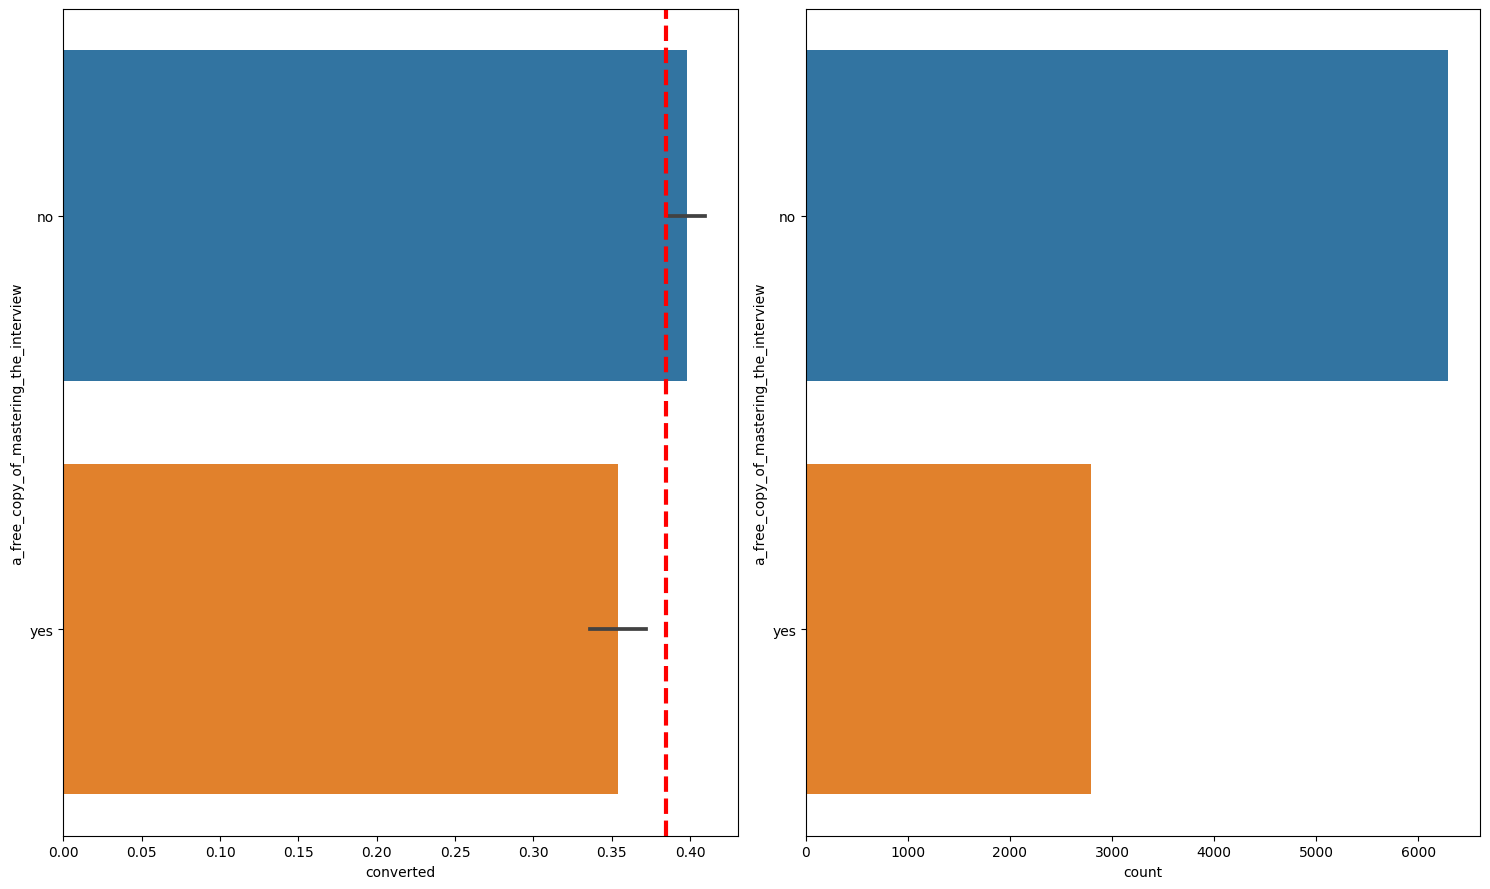

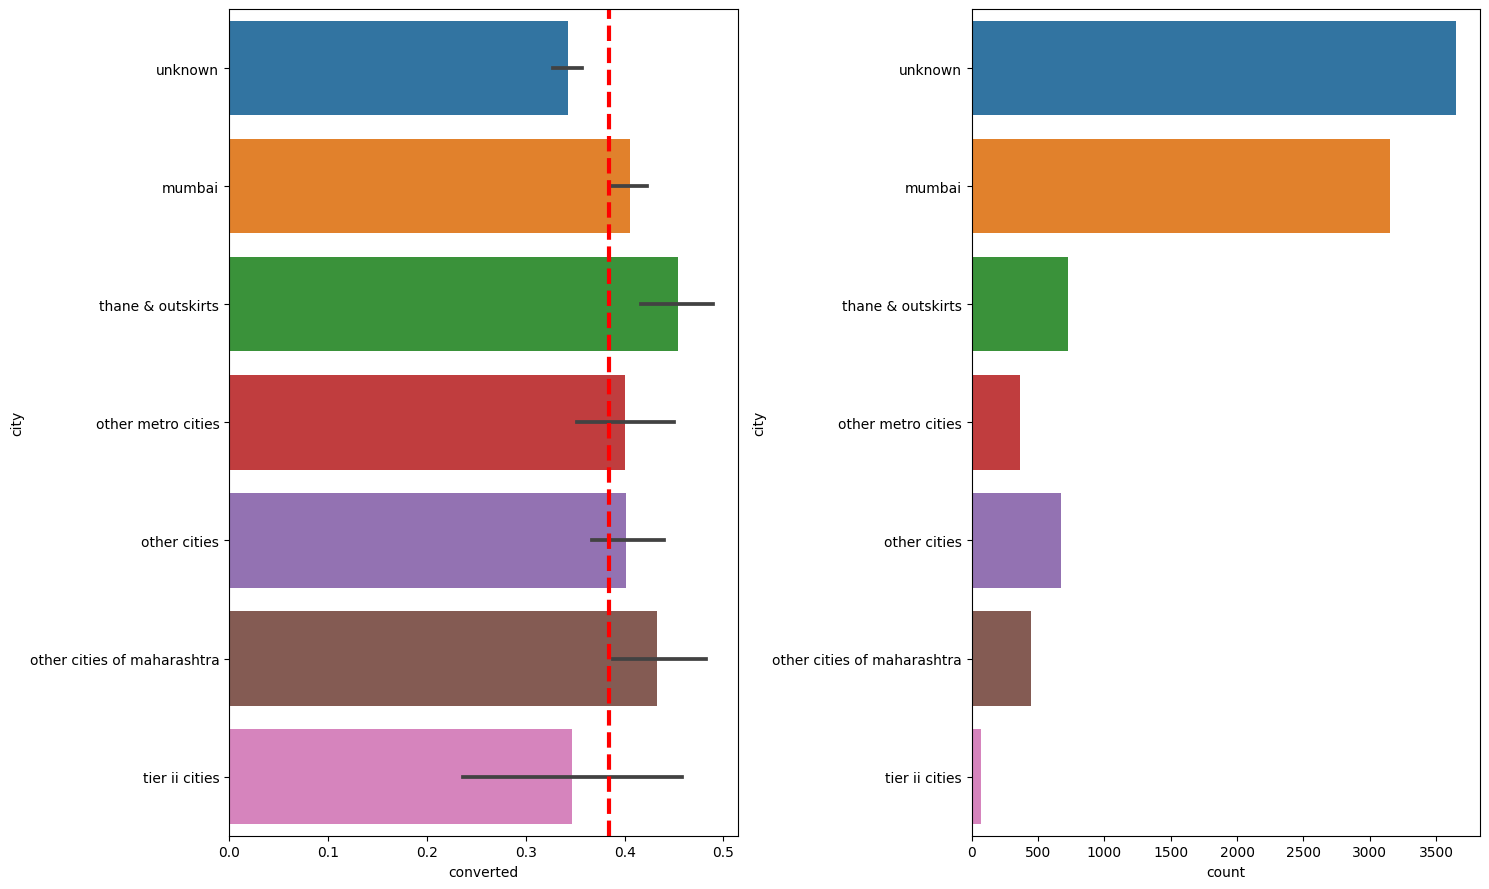

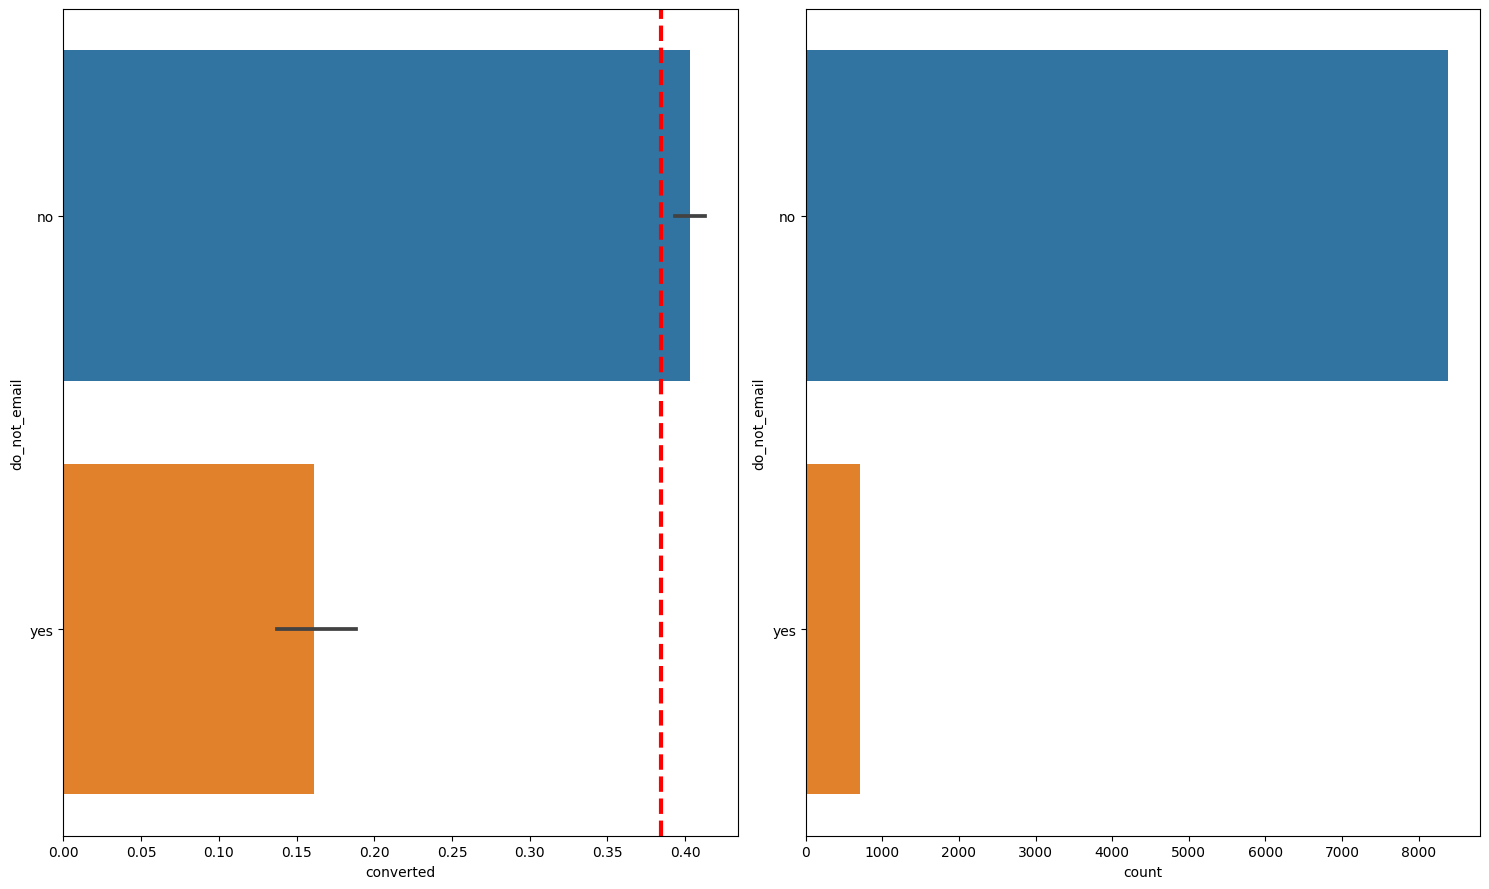

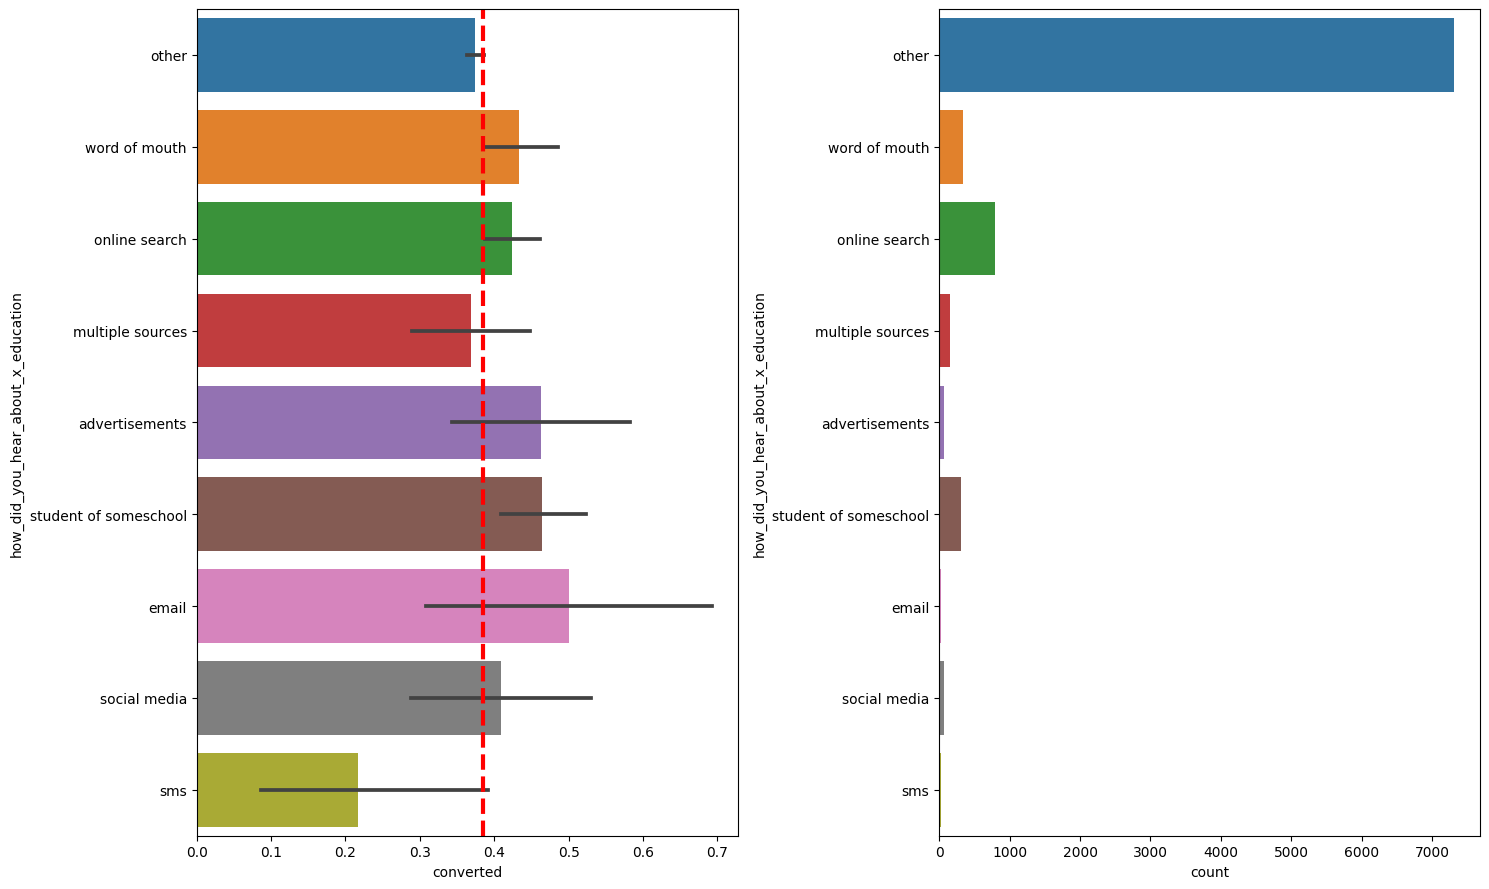

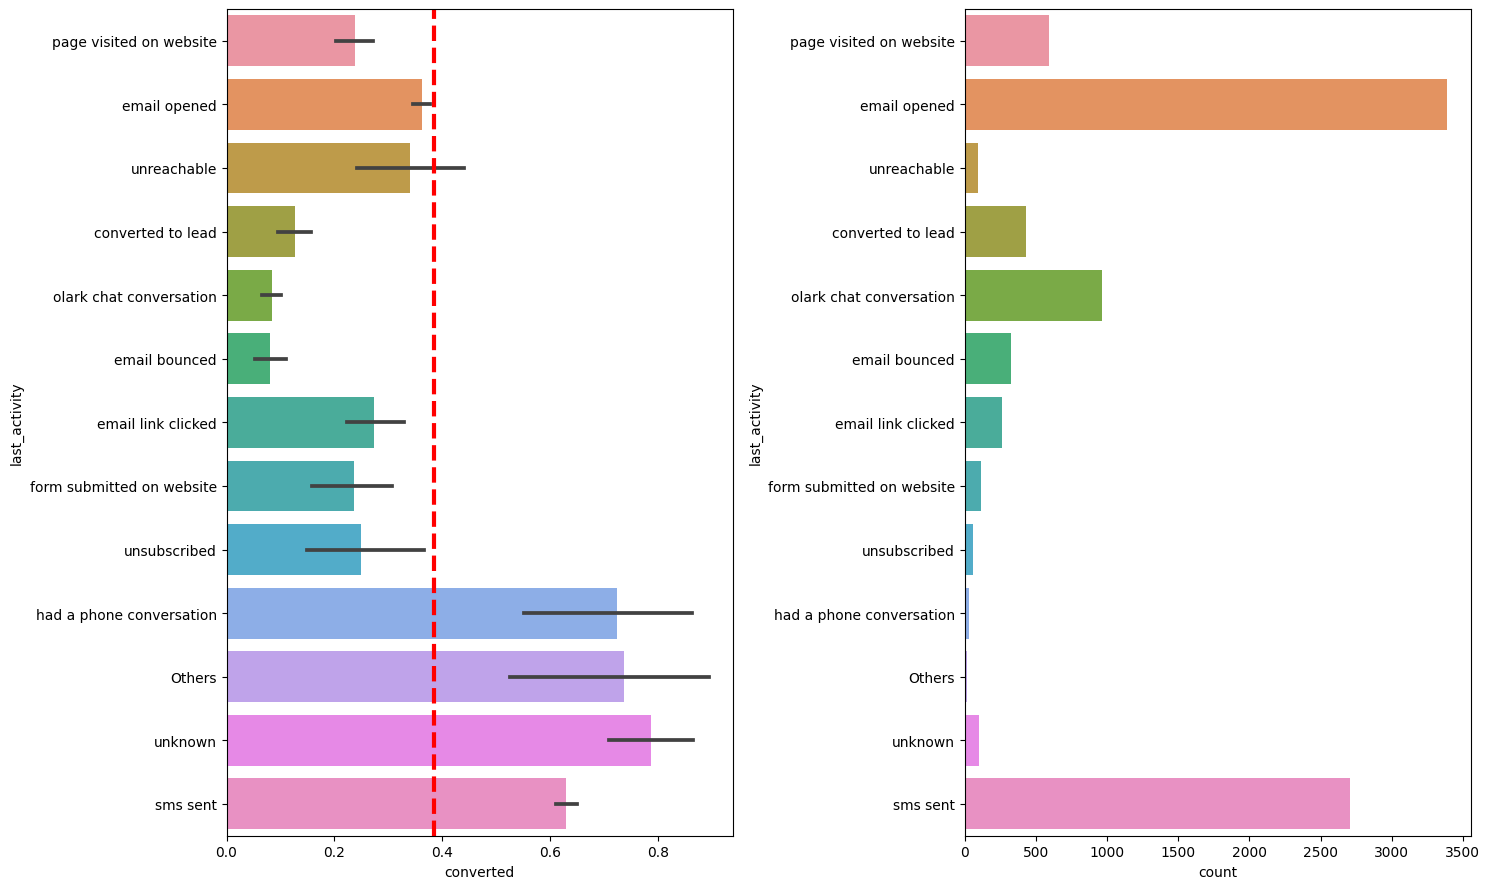

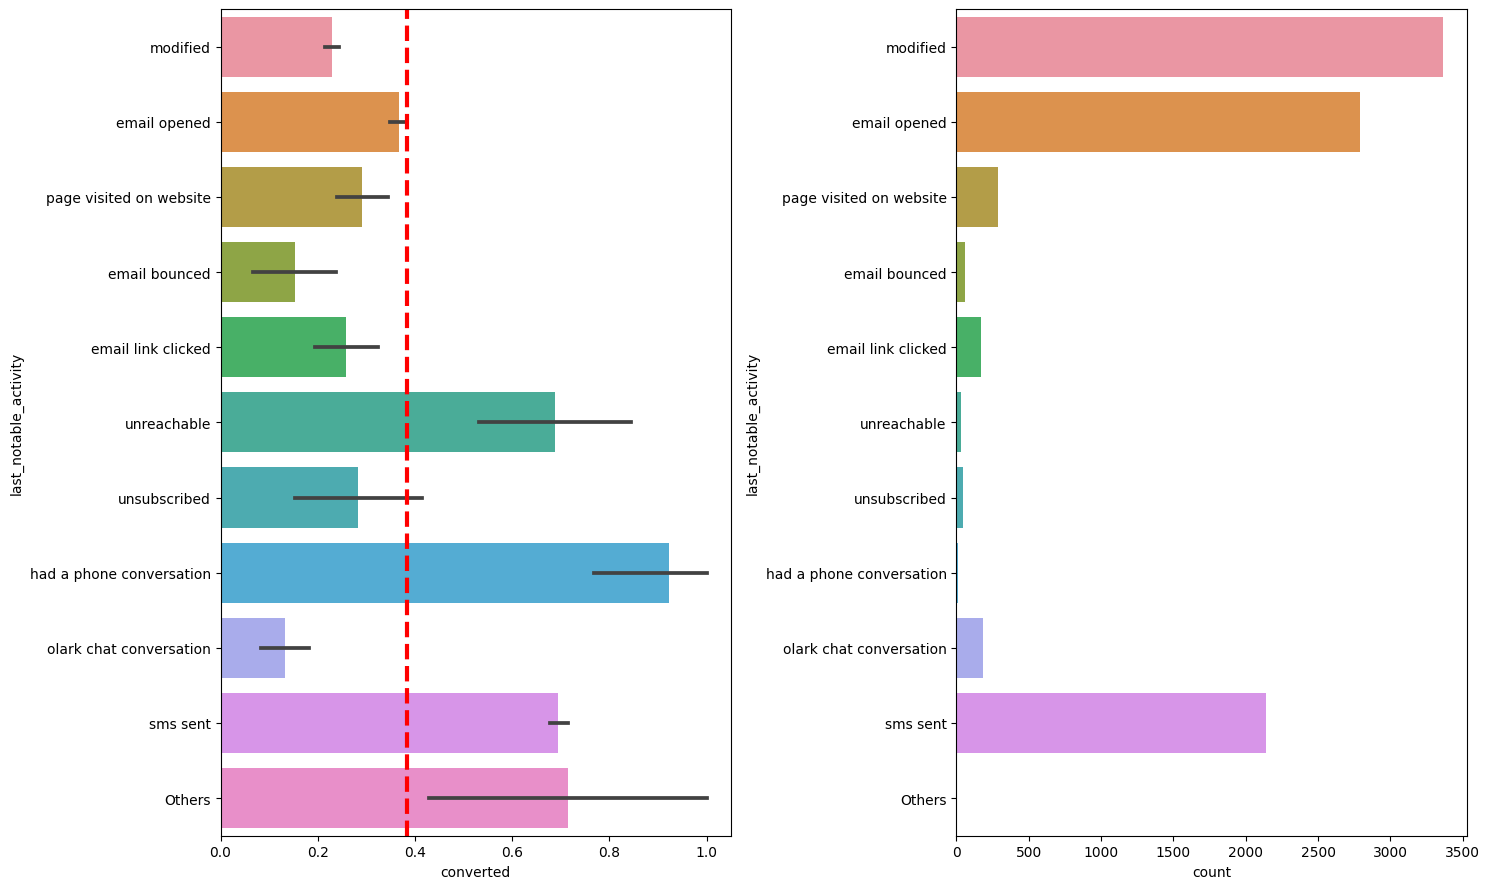

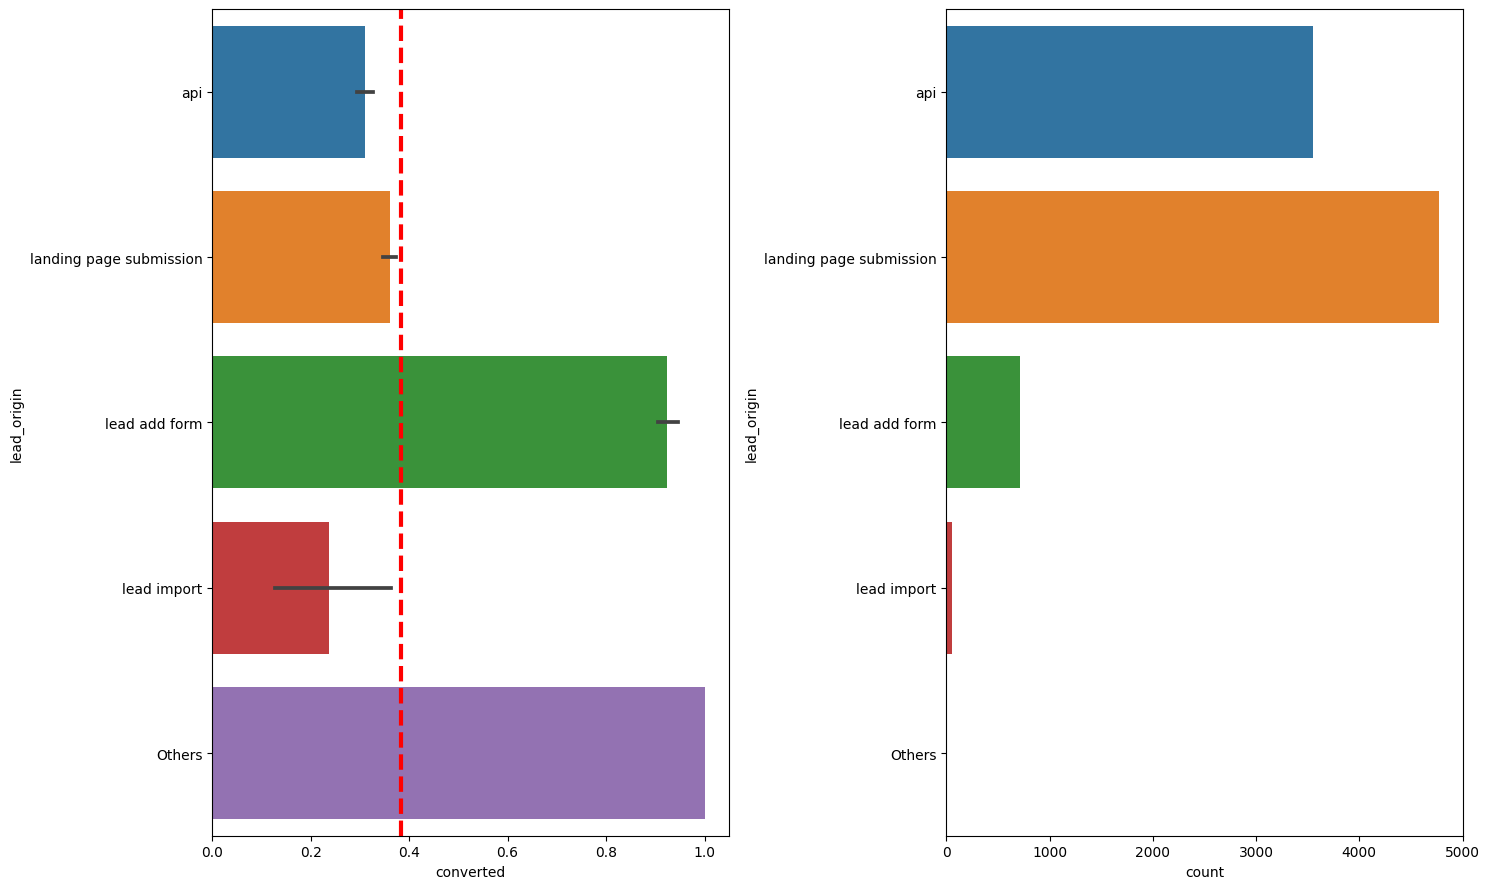

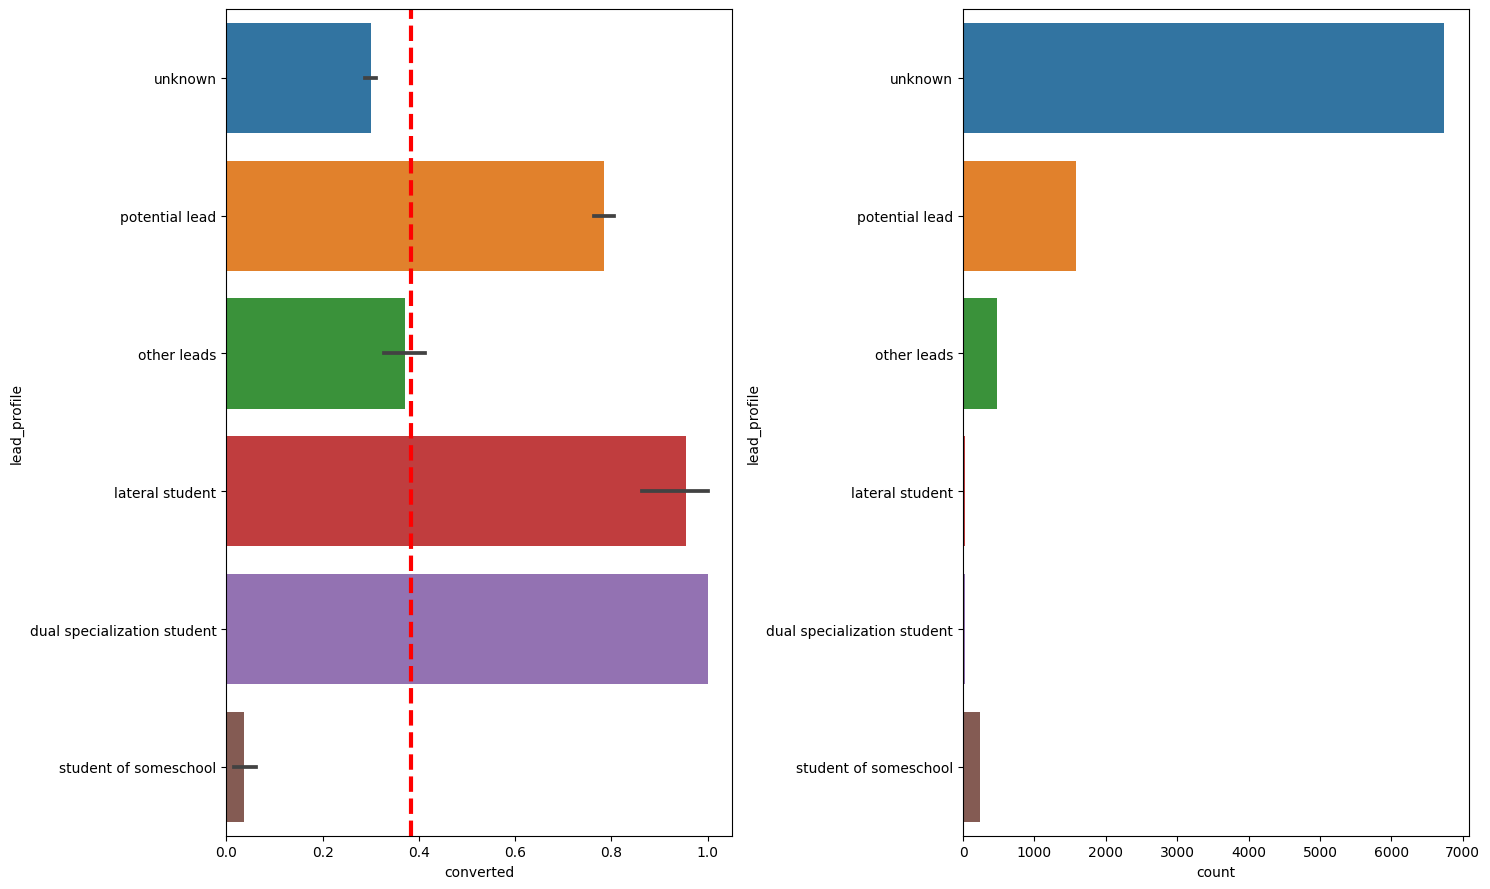

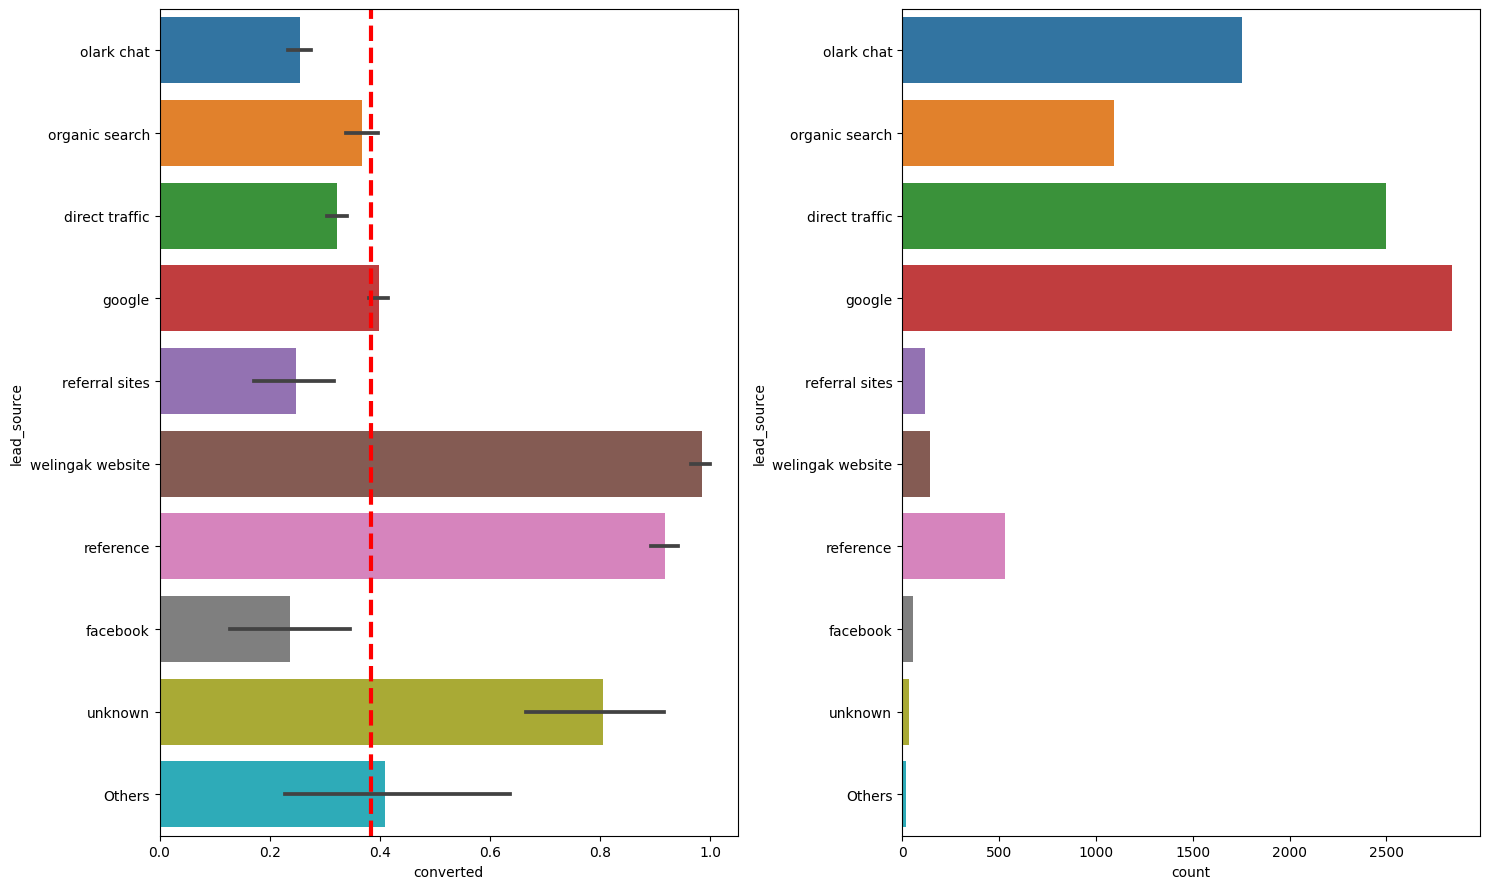

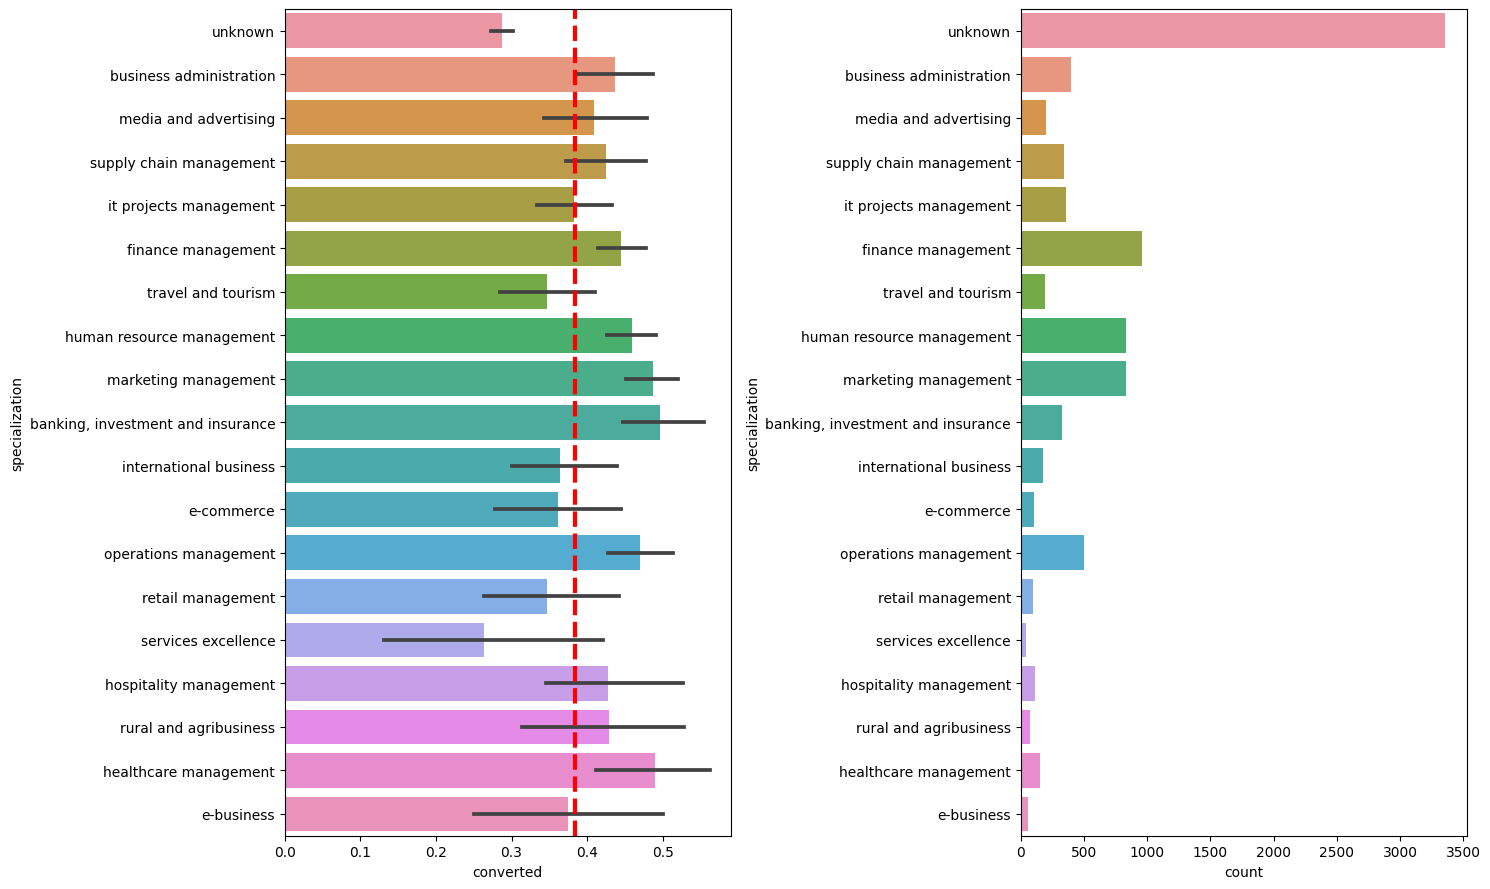

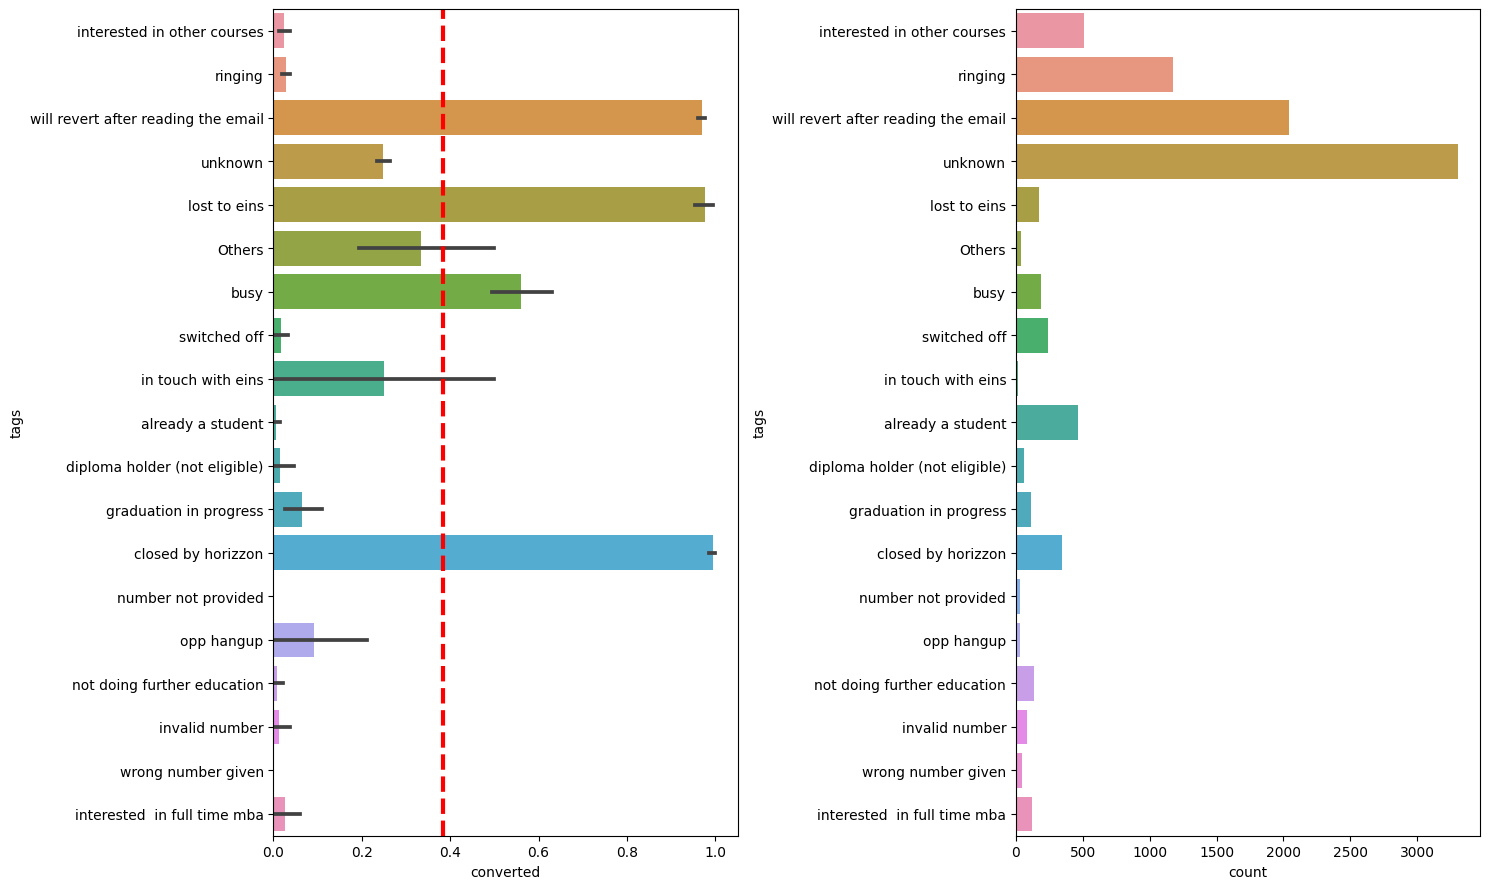

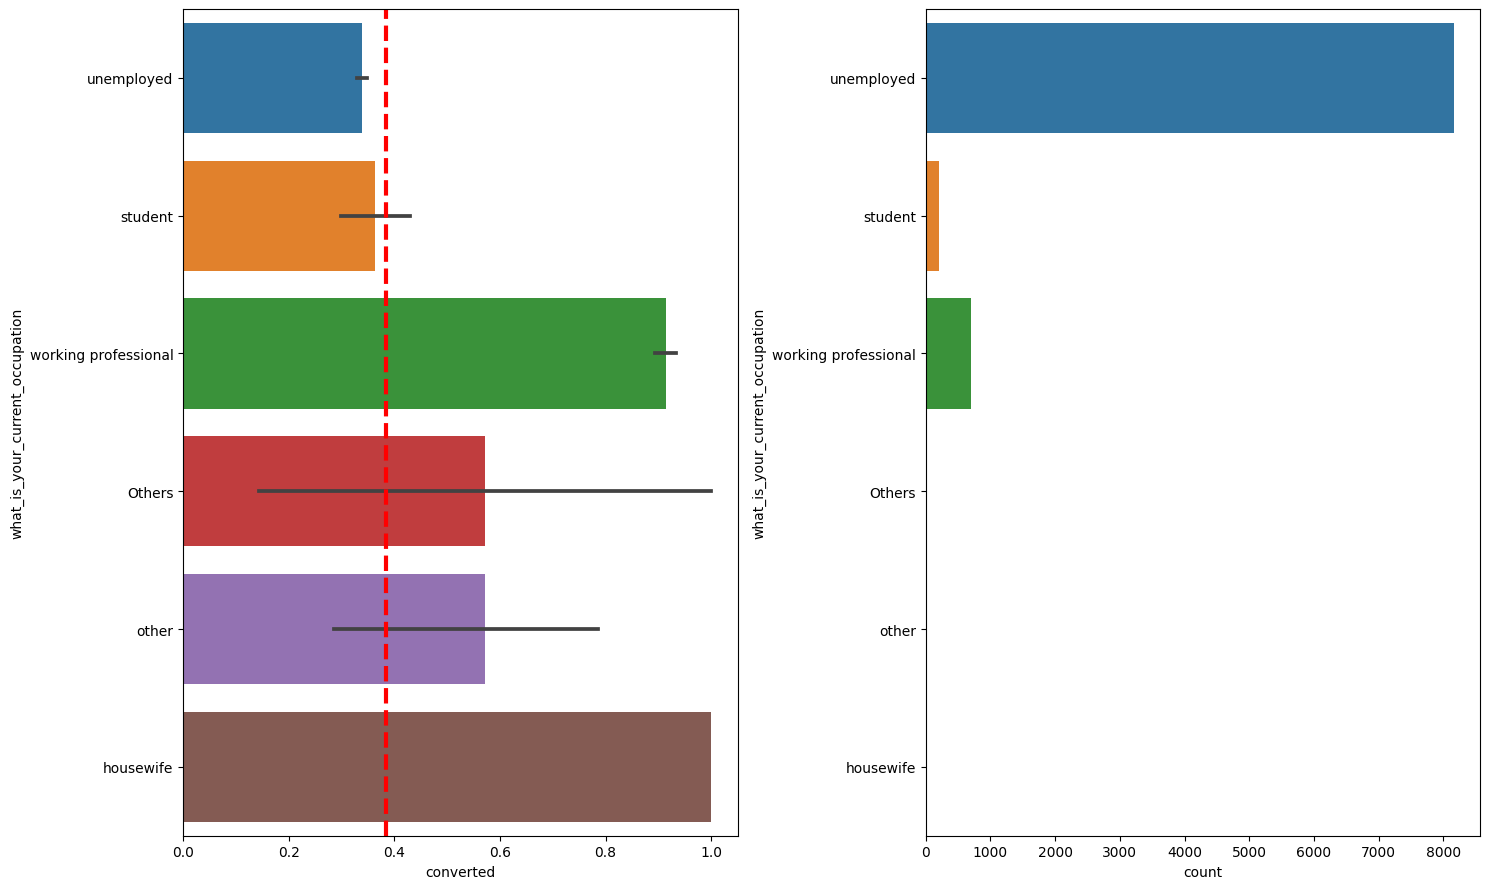

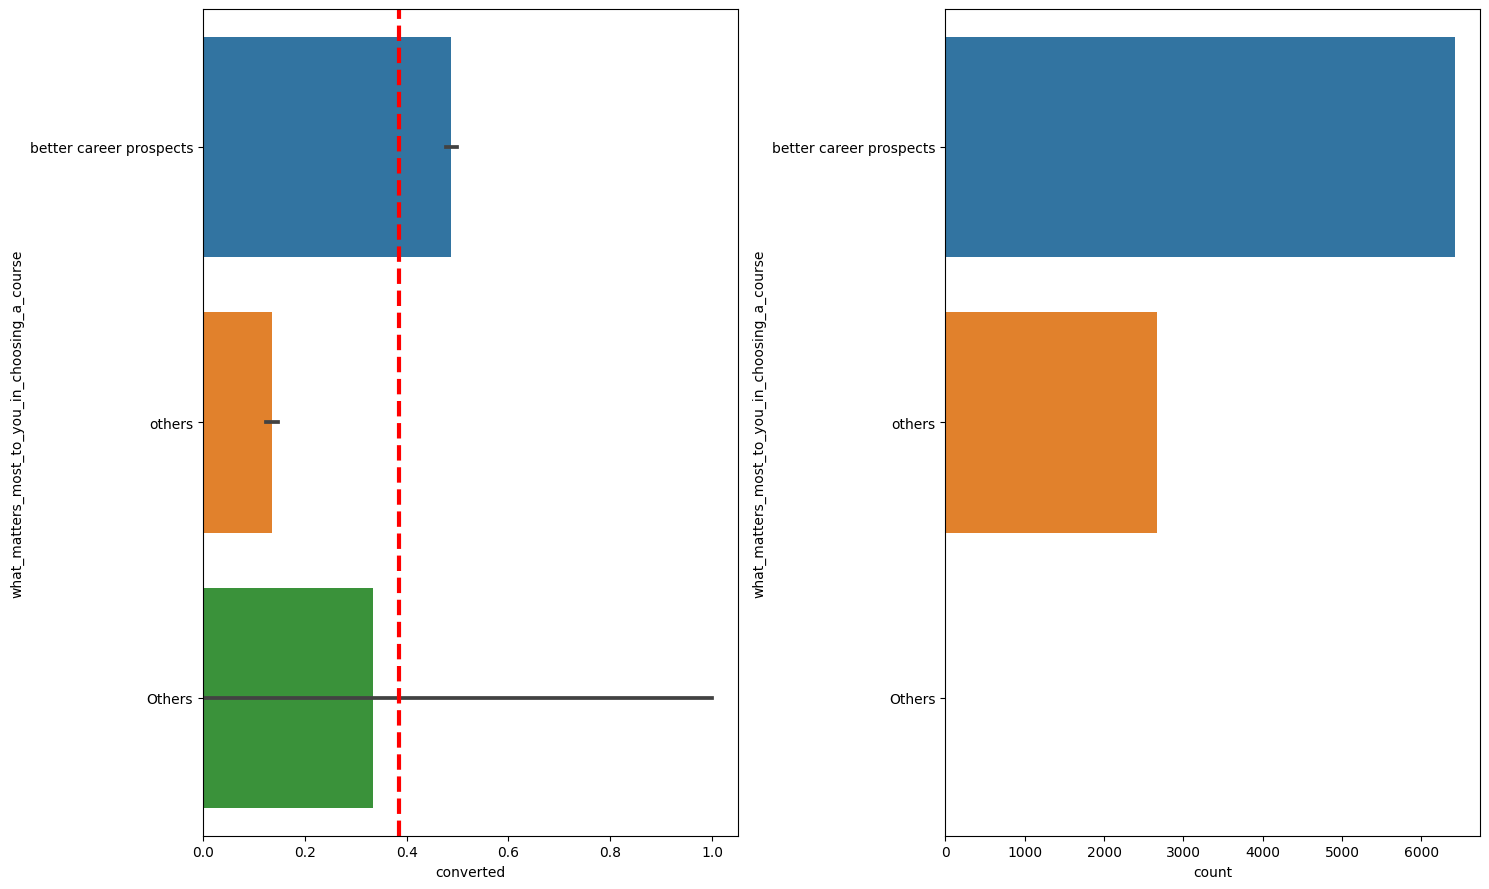

In [44]:
for column in sorted(df.describe(exclude=np.number).columns):
    # we will not plot prospect_id as its just an ID
    if column!='prospect_id':
        analyze_cat_col_with_target_col(column,10)

 ## Observations from above graphs
>1. For Unknown cities the conversion rate is low
2. if email is not marked then the chances of conversion is low  
3. for column *how_did_you_hear_about_x_education* the rate of conversion across inputs is similar  
4. If last activity is "sms sent" then there are good chances that lead will convert    
5. If last notable activity is "sms sent" or "had a phone conversation" then conversion rate is good    
6. "lead add form" is ver good indicator of conversion   
7. In *lead_sources* we see that Google is performing slightly better than average    
8. Referrals is good indicator    
9. Wellingak website even though the count is low but is good indicator     
10. If specialization is unknown then conversion rate drops     
11. Management studies show good conversion rate     
12. the tags 'will revert after reading the email' , 'lost to eins' are good indicator and value 'closed by horizon' has almost perfect convert score.     
13. Working professionals are good area to target     
14. Better Career Prospects or not null value in column *what_matters_most_to_you_in_choosing_a_course* is good for conversion


# Analysis of Numerical Variables

In [45]:
df.dtypes

prospect_id                                       string
lead_number                                        Int64
lead_origin                                       string
lead_source                                       string
do_not_email                                      string
converted                                          Int64
totalvisits                                        Int64
total_time_spent_on_website                        Int64
page_views_per_visit                             float64
last_activity                                     string
specialization                                    string
how_did_you_hear_about_x_education                string
what_is_your_current_occupation                   string
what_matters_most_to_you_in_choosing_a_course     string
tags                                              string
lead_profile                                      string
city                                              string
a_free_copy_of_mastering_the_in

In [46]:
def plot_numeric_data(col):
    sns.barplot(x=df['converted'],y=df[col])
    plt.show()
    sns.boxplot(x=df['converted'],y=df[col])
    plt.show()
    

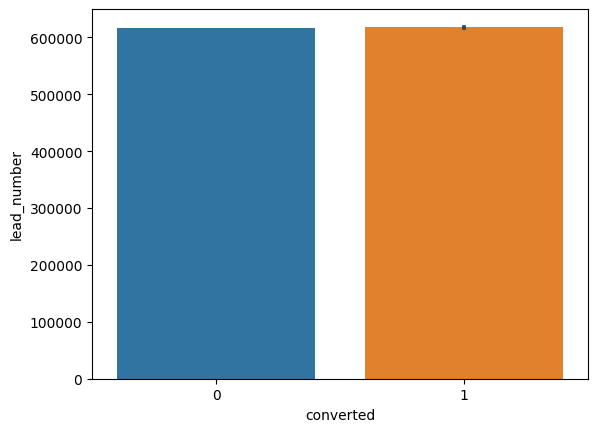

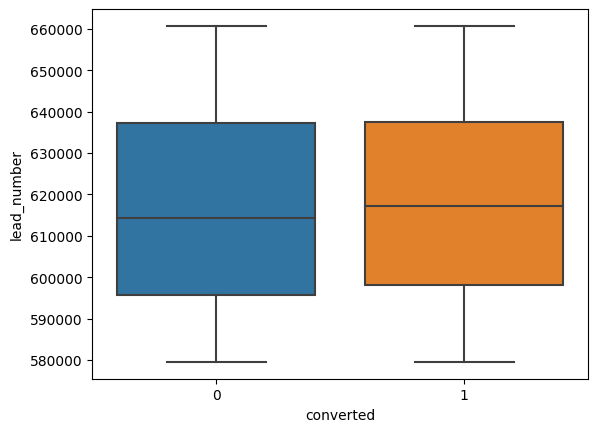

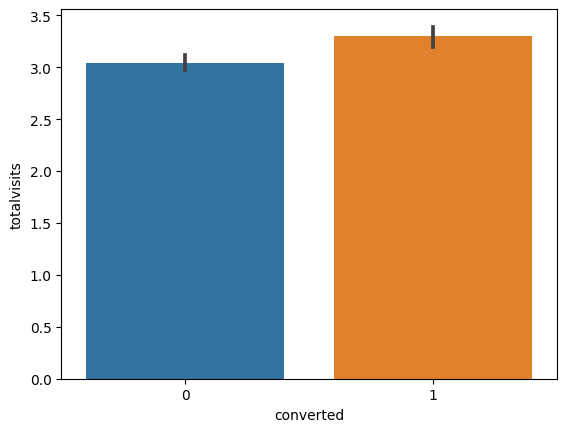

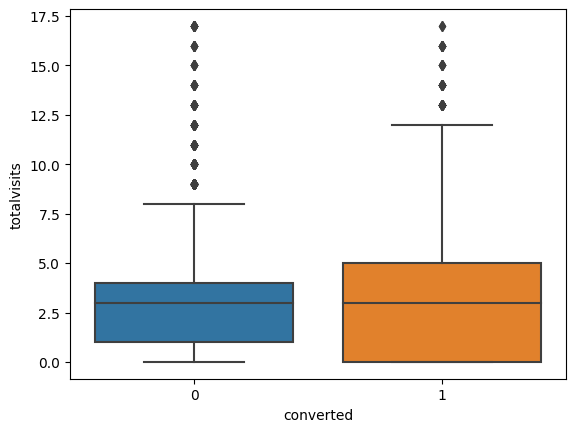

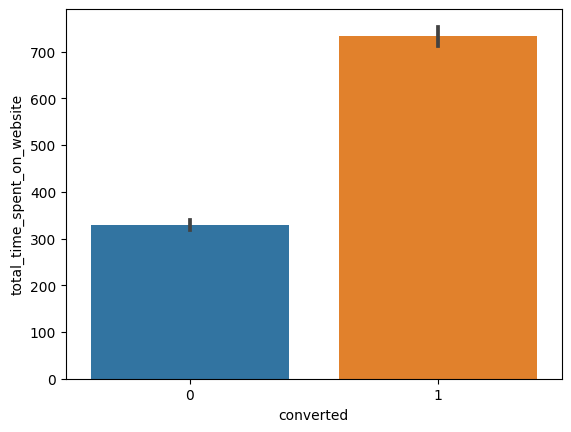

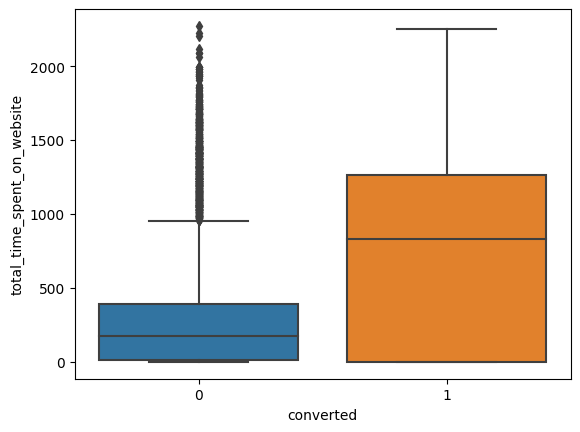

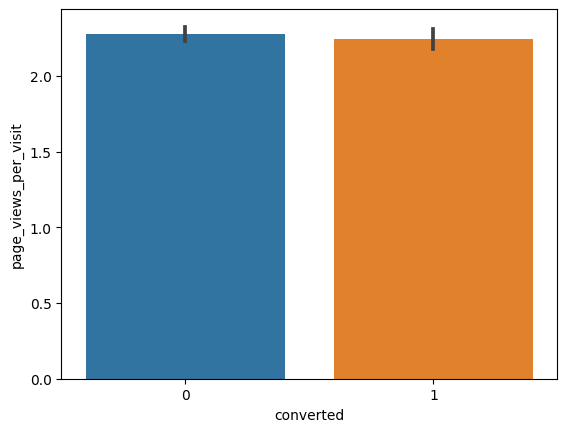

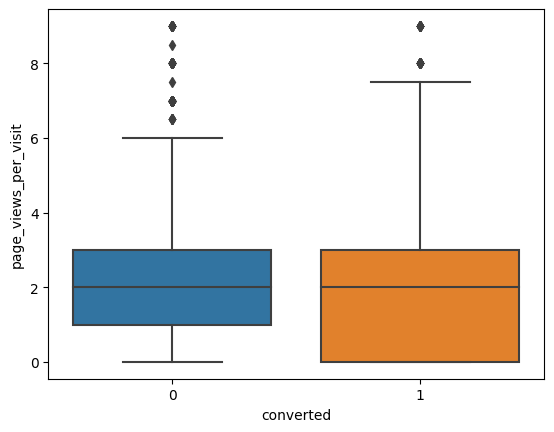

In [47]:
for col in df.describe().columns:
    if col!='converted':
        plot_numeric_data(col)

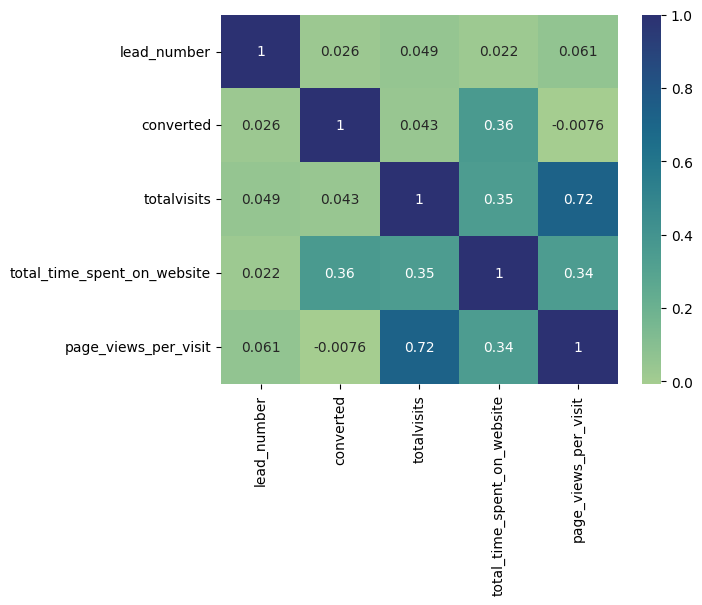

In [48]:
# Checking correlation
sns.heatmap(df[df.describe().columns].corr(),cmap='crest',annot=True)
plt.show()

# Creating Dummy Variables

In [49]:
# droping Id columns
df= df.drop(columns=['prospect_id','lead_number'])

#dropping column of student activity since this is not in line with business problem
df = df.drop(columns=['last_notable_activity'])

#dropping insignificant column 'page_views_per_visit'
df=df.drop(columns=['page_views_per_visit'])

In [50]:
df.describe(exclude=np.number).columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'last_activity',
       'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'tags', 'lead_profile',
       'city', 'a_free_copy_of_mastering_the_interview'],
      dtype='object')

In [51]:
dummy_cat_df=pd.DataFrame()
for col in df.describe(exclude=np.number).columns:
    dummy_cat_df=pd.concat([dummy_cat_df,pd.get_dummies(df[col],prefix=col)],axis=1)
dummy_cat_df.head()

,lead_origin_api,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,lead_origin_quick add form,lead_source_bing,lead_source_blog,lead_source_click2call,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_live chat,lead_source_nc_edm,lead_source_olark chat,lead_source_organic search,lead_source_pay per click ads,lead_source_press_release,lead_source_reference,lead_source_referral sites,lead_source_social media,lead_source_testone,lead_source_unknown,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak website,lead_source_youtubechannel,do_not_email_no,do_not_email_yes,last_activity_approached upfront,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email marked spam,last_activity_email opened,last_activity_email received,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unknown,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow,"specialization_banking, investment and insurance",specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,specialization_unknown,how_did_you_hear_about_x_education_advertisements,how_did_you_hear_about_x_education_email,how_did_you_hear_about_x_education_multiple sources,how_did_you_hear_about_x_education_online search,how_did_you_hear_about_x_education_other,how_did_you_hear_about_x_education_sms,how_did_you_hear_about_x_education_social media,how_did_you_hear_about_x_education_student of someschool,how_did_you_hear_about_x_education_word of mouth,what_is_your_current_occupation_businessman,what_is_your_current_occupation_housewife,what_is_your_current_occupation_other,what_is_your_current_occupation_student,what_is_your_current_occupation_unemployed,what_is_your_current_occupation_working professional,what_matters_most_to_you_in_choosing_a_course_better career prospects,what_matters_most_to_you_in_choosing_a_course_flexibility & convenience,what_matters_most_to_you_in_choosing_a_course_other,what_matters_most_to_you_in_choosing_a_course_others,tags_already a student,tags_busy,tags_closed by horizzon,tags_diploma holder (not eligible),tags_graduation in progress,tags_in confusion whether part time or dlp,tags_in touch with eins,tags_interested in full time mba,tags_interested in next batch,tags_interested in other courses,tags_invalid number,tags_lateral student,tags_lost to eins,tags_lost to others,tags_not doing further education,tags_number not provided,tags_opp hangup,tags_recognition issue (dec approval),tags_ringing,tags_shall take in the next coming month,tags_still thinking,tags_switched off,tags_university not recognized,tags_unknown,tags_want to take admission but has financial problems,tags_will revert after reading the email,tags_wrong number given,lead_profile_dual specialization student,lead_profile_lateral student,lead_profile_other leads,lead_profile_potential lead,lead_profile_student of someschool,lead_profile_unknown,city_mumbai,city_other cities,city_other cities of maharashtra,city_other metro cities,city_thane & outskirts,city_tier ii cities,city_unknown,a_free_copy_of_mastering_the_interview_no,a_free_copy_of_mastering_the_interview_yes
0,1,0,0,0

In [52]:
for col in dummy_cat_df.columns:
     print(dummy_cat_df[col].value_counts())

0    5542
1    3548
Name: lead_origin_api, dtype: int64
1    4769
0    4321
Name: lead_origin_landing page submission, dtype: int64
0    8373
1     717
Name: lead_origin_lead add form, dtype: int64
0    9035
1      55
Name: lead_origin_lead import, dtype: int64
0    9089
1       1
Name: lead_origin_quick add form, dtype: int64
0    9084
1       6
Name: lead_source_bing, dtype: int64
0    9089
1       1
Name: lead_source_blog, dtype: int64
0    9086
1       4
Name: lead_source_click2call, dtype: int64
0    6591
1    2499
Name: lead_source_direct traffic, dtype: int64
0    9035
1      55
Name: lead_source_facebook, dtype: int64
0    6249
1    2841
Name: lead_source_google, dtype: int64
0    9088
1       2
Name: lead_source_live chat, dtype: int64
0    9089
1       1
Name: lead_source_nc_edm, dtype: int64
0    7337
1    1753
Name: lead_source_olark chat, dtype: int64
0    7998
1    1092
Name: lead_source_organic search, dtype: int64
0    9089
1       1
Name: lead_source_pay per click ads,

0    6292
1    2798
Name: a_free_copy_of_mastering_the_interview_yes, dtype: int64


In [53]:
#drop dummy columns with less information
drop_col=[]
for col in dummy_cat_df.columns:
    if round(dummy_cat_df[col].var(),2)<0.01:
        drop_col.append(col)
dummy_cat_df.drop(columns=drop_col,inplace=True,errors='ignore')

In [54]:
# dropping original variables after creating dummies
df=df.drop(columns=df.describe(exclude=np.number).columns)
df=pd.concat([df,dummy_cat_df],axis=1)
df.head()

,converted,totalvisits,total_time_spent_on_website,lead_origin_api,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_olark chat,lead_source_organic search,lead_source_reference,lead_source_referral sites,lead_source_welingak website,do_not_email_no,do_not_email_yes,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email opened,last_activity_form submitted on website,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_sms sent,last_activity_unknown,last_activity_unreachable,last_activity_unsubscribed,"specialization_banking, investment and insurance",specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_supply chain management,specialization_travel and tourism,specialization_unknown,how_did_you_hear_about_x_education_advertisements,how_did_you_hear_about_x_education_multiple sources,how_did_you_hear_about_x_education_online search,how_did_you_hear_about_x_education_other,how_did_you_hear_about_x_education_social media,how_did_you_hear_about_x_education_student of someschool,how_did_you_hear_about_x_education_word of mouth,what_is_your_current_occupation_student,what_is_your_current_occupation_unemployed,what_is_your_current_occupation_working professional,what_matters_most_to_you_in_choosing_a_course_better career prospects,what_matters_most_to_you_in_choosing_a_course_others,tags_already a student,tags_busy,tags_closed by horizzon,tags_diploma holder (not eligible),tags_graduation in progress,tags_interested in full time mba,tags_interested in other courses,tags_invalid number,tags_lost to eins,tags_not doing further education,tags_ringing,tags_switched off,tags_unknown,tags_will revert after reading the email,tags_wrong number given,lead_profile_other leads,lead_profile_potential lead,lead_profile_student of someschool,lead_profile_unknown,city_mumbai,city_other cities,city_other cities of maharashtra,city_other metro cities,city_thane & outskirts,city_tier ii cities,city_unknown,a_free_copy_of_mastering_the_interview_no,a_free_copy_of_mastering_the_interview_yes
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
1,0,5,674,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
2,1,2,1532,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,0,1,305,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,1,2,1428,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [55]:
#dropping insignificant dummy variables from tags
tag_cols={i for i in df.columns if i.startswith('tags')}
set_tag_col_keep={'tags_will revert after reading the email','tags_lost to eins','tags_busy','tags_closed by horizzon'}
tag_col_to_del=tag_cols-set_tag_col_keep
df=df.drop(columns=list(tag_col_to_del))

# Standardizing data values

In [56]:
from sklearn.preprocessing import StandardScaler
numerical_cols=df.describe().columns
scaler=StandardScaler()
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

# Spliting train and test data

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns='converted'),df['converted'],test_size=0.33,random_state=42)

In [58]:
print(f'X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}')

X_train: (6090, 74)
y_train: (6090,)
X_test: (3000, 74)
y_test: (3000,)


# RFE

In [59]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [60]:
logsitic_reg=LogisticRegression(max_iter=600)
rfe=RFE(logsitic_reg, n_features_to_select=20)
rfe.fit(X_train, y_train.astype('int'))
rfe_cols=X_train.columns[rfe.support_]

In [61]:
pd.DataFrame(data=zip(df.columns, rfe.support_))

,0,1
0,converted,False
1,totalvisits,True
2,total_time_spent_on_website,False
3,lead_origin_api,True
4,lead_origin_landing page submission,False
...,...,...
69,city_other metro cities,False
70,city_thane & outskirts,False
71,city_tier ii cities,False
72,city_unknown,False


# Building Models

In [62]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

## First Iteration

In [63]:
rfe_cols

Index(['total_time_spent_on_website', 'lead_origin_landing page submission',
       'lead_source_direct traffic', 'lead_source_facebook',
       'lead_source_google', 'lead_source_organic search',
       'lead_source_welingak website', 'last_activity_email opened',
       'last_activity_sms sent', 'what_is_your_current_occupation_student',
       'what_is_your_current_occupation_unemployed',
       'what_is_your_current_occupation_working professional', 'tags_busy',
       'tags_closed by horizzon', 'tags_lost to eins',
       'tags_will revert after reading the email', 'lead_profile_other leads',
       'lead_profile_potential lead', 'lead_profile_student of someschool',
       'lead_profile_unknown'],
      dtype='object')

In [64]:
def get_vif_val(cols):
    # Calculating VIF values
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif=pd.DataFrame()
    vif['Features']=X_train[cols].columns
    vif['VIF']=[variance_inflation_factor(X_train[cols].values,i) for i in range(X_train[cols].shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    print(vif)

def train_model(cols):
    X_train_sm=sm.add_constant(X_train[cols])
    logistic_model_1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
    res=logistic_model_1.fit()
    print(res.summary())
    return X_train_sm,res
    

In [65]:
X_train_sm,res=train_model(rfe_cols)
get_vif_val(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6090
Model:                            GLM   Df Residuals:                     6069
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1414.1
Date:                Mon, 17 Jul 2023   Deviance:                       2828.1
Time:                        18:09:36   Pearson chi2:                 6.75e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

# Second Iteration

In [66]:
# dropping high VIF column
cols=rfe_cols.drop('lead_profile_unknown')
X_train_sm,res=train_model(cols)
get_vif_val(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6090
Model:                            GLM   Df Residuals:                     6070
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1414.9
Date:                Mon, 17 Jul 2023   Deviance:                       2829.9
Time:                        18:09:37   Pearson chi2:                 6.77e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

# Third Iteration

In [67]:
cols=cols.drop('what_is_your_current_occupation_unemployed')
X_train_sm,res=train_model(cols)
get_vif_val(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6090
Model:                            GLM   Df Residuals:                     6071
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1415.9
Date:                Mon, 17 Jul 2023   Deviance:                       2831.8
Time:                        18:09:37   Pearson chi2:                 6.78e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

# Fourth Iteration

In [68]:
cols=cols.drop('what_is_your_current_occupation_working professional',errors='ignore')
X_train_sm,res=train_model(cols)
get_vif_val(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6090
Model:                            GLM   Df Residuals:                     6072
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.0
Date:                Mon, 17 Jul 2023   Deviance:                       2832.0
Time:                        18:09:37   Pearson chi2:                 6.83e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

# Fifth Itreation

In [69]:
cols=cols.drop('what_is_your_current_occupation_student',errors='ignore')
X_train_sm,res=train_model(cols)
get_vif_val(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6090
Model:                            GLM   Df Residuals:                     6073
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.4
Date:                Mon, 17 Jul 2023   Deviance:                       2832.8
Time:                        18:09:37   Pearson chi2:                 6.81e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

# Sixth Iteration

In [70]:
cols=cols.drop('lead_profile_potential lead',errors='ignore')
X_train_sm,res=train_model(cols)
get_vif_val(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6090
Model:                            GLM   Df Residuals:                     6074
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.8
Date:                Mon, 17 Jul 2023   Deviance:                       2833.7
Time:                        18:09:38   Pearson chi2:                 6.87e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

# Seventh Iteration

In [71]:
cols=cols.drop('lead_profile_other leads',errors='ignore')
X_train_sm,res=train_model(cols)
get_vif_val(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6090
Model:                            GLM   Df Residuals:                     6075
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1417.5
Date:                Mon, 17 Jul 2023   Deviance:                       2835.0
Time:                        18:09:38   Pearson chi2:                 6.85e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

# Predicting on train data

In [72]:
pred = res.predict(X_train_sm)
y_train_prob = pd. DataFrame(data={'original': y_train.astype('int'), 'pred_prob': pred})

In [73]:
y_train_prob.head()

,original,pred_prob
3350,1,0.745740
2450,0,0.094208
5584,0,0.133072
5537,0,0.022485
637,1,0.224674


In [74]:
scores = []
for i in np.linspace(0,1,20):
    y_train_prob['pred'] = y_train_prob['pred_prob'].apply(lambda x: 1 if x > i else 0)
    cm = confusion_matrix(y_train_prob.original, y_train_prob.pred)
    tp = cm[0,0]
    tn = cm[1,1]
    fp = cm[0,1]
    fn = cm[1,0]
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    sensitivity = (tp)/(tp+fn)
    specificity = (tn)/(tn+fp)
    precision = (tp)/(tp+fp)
    scores.append({'cutoff':i,'accuracy':accuracy,'specificity':specificity,'sensitivity':sensitivity,'precision':precision})
df_scores=pd.DataFrame(scores)

In [75]:
df_scores

,cutoff,accuracy,specificity,sensitivity,precision
0,0.000000,0.386207,0.386207,NaN,0.000000
1,0.052632,0.727586,0.587833,0.984615,0.565008
2,0.105263,0.797044,0.661365,0.975304,0.686731
3,0.157895,0.874056,0.780531,0.954977,0.834136
4,0.210526,0.888013,0.812969,0.946523,0.866506
5,0.263158,0.894910,0.836743,0.936584,0.888978
6,0.315789,0.899672,0.854872,0.929887,0.904762
7,0.368421,0.903448,0.869656,0.925216,0.916800
8,0.421053,0.901642,0.904103,0.900281,0.944355
9,0.473684,0.902627,0.916627,0.895200,0.952916


# Accuracy vs Sensitivity vs Specificity Curve

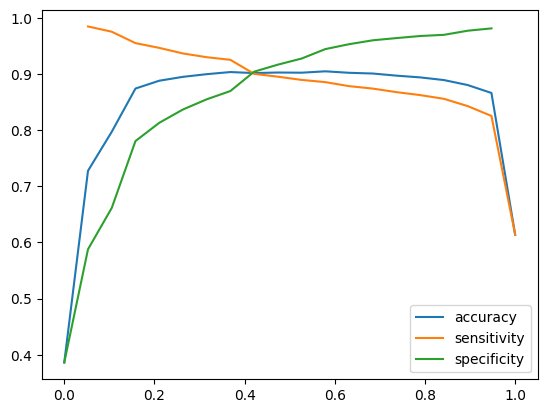

In [76]:
plt.plot(df_scores.cutoff, df_scores.accuracy, label='accuracy')
plt.plot(df_scores.cutoff, df_scores.sensitivity, label='sensitivity')
plt.plot(df_scores.cutoff, df_scores.specificity, label='specificity')
plt.legend()
plt.show()

#After below graph we can choose cut off at 0.41

# Results on Train Data

In [77]:
X_train_sm=sm.add_constant(X_train[cols])
logistic_model_1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logistic_model_1.fit()

pred=res.predict(X_train_sm)

y_train_prob = pd.DataFrame(data={'original': y_train.astype('int'), 'pred_prob': pred})

y_train_prob['pred']=y_train_prob['pred_prob'].apply(lambda x: 1 if x > 0.41 else 0)

cm = confusion_matrix(y_train_prob.original, y_train_prob.pred)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
accuracy = (tp+tn)/(tp+tn+fp+fn)
sensitivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
precision = (tp)/(tp+fp)

print(f'Accuracy: {accuracy}\nSensitivty:{sensitivity}\nSpecificity:{specificity}\nPrecision:{precision}')

Accuracy: 0.9014778325123153
Sensitivty:0.9010736196319018
Specificity:0.9022038567493113
Precision:0.9430176565008026


# ROC Curve

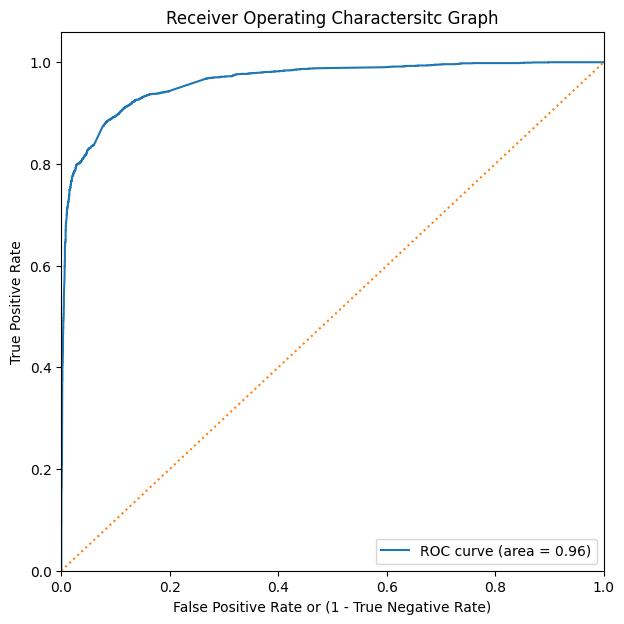

In [78]:
def roc_draw(actual, prob):
    fpr, tpr, threshold = metrics.roc_curve(y_train_prob.original, y_train_prob.pred_prob,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual, prob)
    plt.figure(figsize=(7,7))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],':')
    plt.ylim([0.0,1.06])
    plt.xlim([0.0,1.0])
    plt.xlabel('False Positive Rate or (1 - True Negative Rate)')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Charactersitc Graph')
    plt.legend(loc='lower right')
    plt.show()

roc_draw(y_train_prob.original,y_train_prob.pred_prob)

# Precision Recall Curve

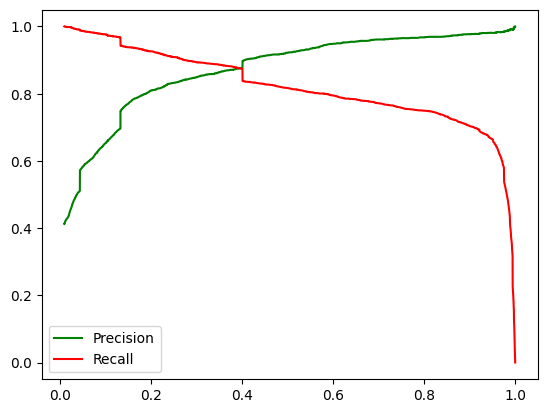

In [79]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train_prob.original,y_train_prob.pred_prob)

plt.plot(threshold, precision[:-1], "g-",label='Precision')
plt.plot(threshold, recall[:-1], "r-",label='Recall')
plt.legend(loc='lower left')
plt.show()

# Prediction on Test Data

In [80]:
X_test_sm=sm.add_constant(X_test)
test_pred=res.predict(X_test_sm[X_train_sm.columns])

In [81]:
y_test = pd.DataFrame(zip(y_test, test_pred), columns=['y_test','y_test_prob'])

In [82]:
y_test['pred']=y_test['y_test_prob'].apply(lambda x: 1 if x > 0.40 else 0) #using cut off from Precision-Recall Curve

In [83]:
cm = confusion_matrix(y_train_prob.original, y_train_prob.pred)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
accuracy = (tp+tn)/(tp+tn+fp+fn)
sensitivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
precision = (tp)/(tp+fp)

print(f'Accuracy: {accuracy}\nSensitivty:{sensitivity}\nSpecificity:{specificity}\nPrecision:{precision}')

Accuracy: 0.9014778325123153
Sensitivty:0.9010736196319018
Specificity:0.9022038567493113
Precision:0.9430176565008026


In [84]:
# importance of each column
col_impt=pd.DataFrame(res.params).reset_index().rename(columns={'index':'col_name',0:'importance'})
col_impt['abs_importance']=np.abs(col_impt.importance)
col_impt.sort_values('abs_importance',ascending=False).reset_index(drop=True)

,col_name,importance,abs_importance
0,tags_will revert after reading the email,2.318452,2.318452
1,tags_closed by horizzon,1.487317,1.487317
2,last_activity_sms sent,1.232630,1.232630
3,total_time_spent_on_website,1.040612,1.040612
4,tags_lost to eins,0.920300,0.920300
5,lead_source_welingak website,0.601376,0.601376
6,last_activity_email opened,0.589220,0.589220
7,lead_source_direct traffic,-0.557261,0.557261
8,lead_origin_landing page submission,-0.445596,0.445596
9,const,-0.426372,0.426372


# Conclusion :

> ## Train Data Score:
> __Accuracy__: 90.14%
> __Sensitivty__: 90.10%
> __Specificity__: 90.22%


> ## Test Data Score:
> __Accuracy__: 90.14%
> __Sensitivty__: 90.10%
> __Specificity__: 90.22%